# Assessment Task
## Part I



#### Introduction and objectives of the assessment:

This dataset focuses on analyzing Canopy Growth Corporation's financial data, obtained from Yahoo Finance, to apply clustering algorithms and time series models. The primary objective is to segment the market using clustering techniques and forecast future prices using an ARIMA model. The analysis involves analyzing how CGC's stock price has fluctuated over time and what market factors might have influenced those fluctuations.


#### Motivation:

The purpose of this analysis is to understand market trends and predict their behavior in order to make informed investment decisions. Trend analysis allows for identifying whether Canopy Growth Corporation's stock price is following an upward, downward, or stable trend, helping to understand its behavior in relation to market cycles. Meanwhile, seasonality analysis seeks to identify cyclical price patterns that repeat over specific periods, such as months or years, which can be useful for anticipating movements related to market or company events.

#### Dataset Description:

The dataset is sourced from Yahoo Finance and contains information on historical stock prices over the past five years.


#### Problem Domain: 

The Problem Domain focuses on analyzing and modeling the behavior of CGC stock within a financial context. It leverages statistical and machine learning techniques to understand market dynamics, predict future prices, and evaluate the associated risks and returns. This analysis is crucial for making informed financial investment decisions.

#### Objectives:

* To implement clustering algorithms to segment the data.
* Apply time series models to predict stock prices.
* Evaluate the models using performance metrics such as the Silhouette Score and the Davies-Bouldin Index.

#

# Canopy Growth Corporation (CGC)
#### About this file


Description
Canopy Growth Corporation (CGC) is a leading player in the cannabis and hemp-based products industry, operating in various markets including the United States, Canada, Germany, and other international regions. The company produces a wide range of products for both recreational and medical purposes. Here's a breakdown of the key details regarding its business operations and the CGC dataset:

The CGC dataset contains historical stock price data, and the relevant columns are:

* Date: Date of the observation.

* Open: Opening price of the stock.

* High: Highest price reached during the day.

* Low: Lowest price reached during the day.

* Close: Closing price of the stock.

* Volume: Volume of shares traded.

# References

* https://finance.yahoo.com/quote/CGC/
* https://finance.yahoo.com/

#

## Observing and Describing Data

The first stage of the analysis involves a detailed review of the raw data. It begins by loading the dataset, verifying the presence of key columns and ensuring that the date format is suitable for time series analysis. The data's integrity is then validated by checking for missing values, which is crucial to avoid erroneous model results. Once these preparation steps are completed, the data is ready for processing and analysis in subsequent phases of the project, ensuring it is properly structured for clustering and time series analysis.

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score, silhouette_score
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
import statsmodels.tsa.api as smtsa
from sklearn.impute import SimpleImputer

In [11]:
df = pd.read_csv('CGC_Fianance.csv')
df.head()

,Date,Open,High,Low,Close,Volume
0,07/04/2014,24.480000,34.580002,24.440001,33.000000,16860
1,08/04/2014,35.540001,38.959999,34.930000,36.290001,13680
2,09/04/2014,37.200001,37.200001,31.000000,32.990002,7520
3,10/04/2014,33.459999,34.939999,30.290001,32.849998,20610
4,11/04/2014,32.040001,32.930000,30.450001,30.850000,11460


In [12]:
df.shape

(2775, 6)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2775 entries, 0 to 2774
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2775 non-null   object 
 1   Open    2775 non-null   float64
 2   High    2775 non-null   float64
 3   Low     2775 non-null   float64
 4   Close   2775 non-null   float64
 5   Volume  2775 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 130.2+ KB


In [14]:
CGC_Fianance = df

In [15]:
CGC_Fianance.head()

,Date,Open,High,Low,Close,Volume
0,07/04/2014,24.480000,34.580002,24.440001,33.000000,16860
1,08/04/2014,35.540001,38.959999,34.930000,36.290001,13680
2,09/04/2014,37.200001,37.200001,31.000000,32.990002,7520
3,10/04/2014,33.459999,34.939999,30.290001,32.849998,20610
4,11/04/2014,32.040001,32.930000,30.450001,30.850000,11460


In [16]:
CGC_Fianance['Date'] = pd.to_datetime(CGC_Fianance['Date'], format='%d/%m/%Y')
print(CGC_Fianance['Date'].dtype)

datetime64[ns]


In [17]:
CGC_Fianance.head()

,Date,Open,High,Low,Close,Volume
0,2014-04-07,24.480000,34.580002,24.440001,33.000000,16860
1,2014-04-08,35.540001,38.959999,34.930000,36.290001,13680
2,2014-04-09,37.200001,37.200001,31.000000,32.990002,7520
3,2014-04-10,33.459999,34.939999,30.290001,32.849998,20610
4,2014-04-11,32.040001,32.930000,30.450001,30.850000,11460


In [26]:
CGC_Fianance.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

# 

## Part II -Clustering

#### Comparative Analysis of Clustering Algorithms: 
In this analysis, two clustering algorithms were implemented: K-means and DBSCAN, which were evaluated using the Silhouette Score and the Davies-Bouldin Index.

#### Justification for Selected Algorithms

Two clustering algorithms were selected for this dataset:

* K-Means: It was used to group observations into a predetermined number of clusters.

* DBSCAN Algorithm: This algorithm is used to detect clusters arbitrarily, not requiring a predefined number of clusters.

* Silhouette Score: was used to measure the quality of the clusters formed. The Silhouette Score ranges from -1 to 1, where values close to 1 indicate well-defined clusters.

* Davies-Bouldin Index** measures the separation between clusters. Lower values indicate better separation.

* Analysis of these two algorithms showed that K-means performed slightly better in terms of Silhouette Score, while DBSCAN performed better in terms of cluster separation according to the Davies-Bouldin Index.

## Clustering 01 - K-means

#### Implementation of K-Means:

The variables Open, Close, and Volume are first standardized with StandardScaler, resulting in a mean of 0 and standard deviation of 1 for each. Preventing scaling differences between variables from affecting results is critical. Using those characteristics, the K-means algorithm then divides Canopy Growth Corporation’s stock price data into three segments. PCA simplifies visualization of clusters by reducing the data from three to two dimensions for a 2D graph. Cluster labels are appended to the original DataFrame, enabling simple identification of each observation’s group.

In [31]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(CGC_Fianance[['Open', 'Close', 'Volume']])

kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(x_scaled)

pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)

CGC_Fianance['cluster'] = y_kmeans

CGC_Fianance.head()

,Date,Open,High,Low,Close,Volume,cluster
0,2014-04-07,24.480000,34.580002,24.440001,33.000000,16860,1
1,2014-04-08,35.540001,38.959999,34.930000,36.290001,13680,1
2,2014-04-09,37.200001,37.200001,31.000000,32.990002,7520,1
3,2014-04-10,33.459999,34.939999,30.290001,32.849998,20610,1
4,2014-04-11,32.040001,32.930000,30.450001,30.850000,11460,1


#### Visualisation of clusters:

The data is grouped using the K-means algorithm into three clusters, represented by points of different colors: red, blue, and green. These groups are visualized in a two-dimensional space using the two principal components obtained through PCA. The cluster centroids, marked in yellow, are located near the center of each group, representing the most representative points of each.

This graph makes it easy to observe how trading days cluster according to opening, closing, and transaction volume characteristics. It provides a clear visual representation of how K-means has segmented the data.

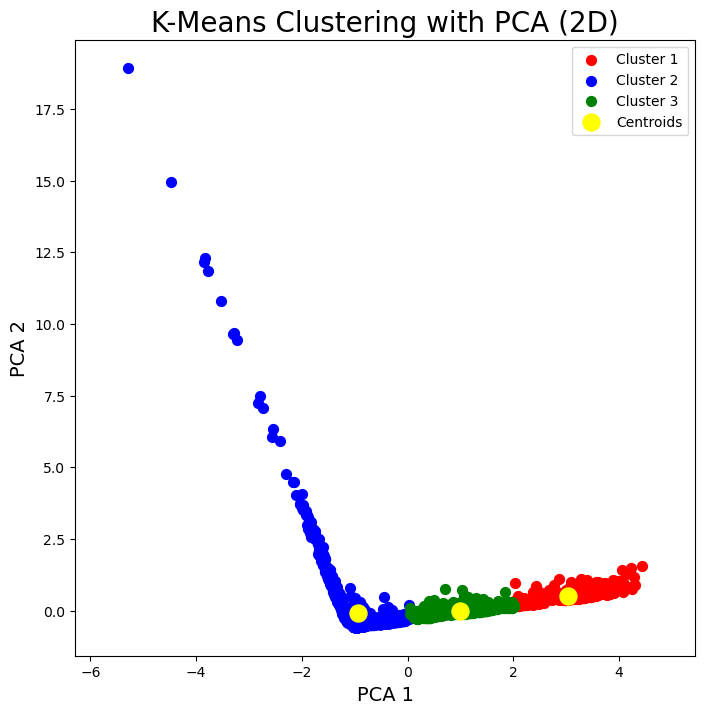

In [34]:
plt.figure(figsize=(8, 8))
plt.scatter(x_pca[y_kmeans == 0, 0], x_pca[y_kmeans == 0, 1], s=50, c='red', label='Cluster 1')
plt.scatter(x_pca[y_kmeans == 1, 0], x_pca[y_kmeans == 1, 1], s=50, c='blue', label='Cluster 2')
plt.scatter(x_pca[y_kmeans == 2, 0], x_pca[y_kmeans == 2, 1], s=50, c='green', label='Cluster 3')

centroids = pca.transform(kmeans.cluster_centers_)  # Proyectar centroides en el espacio 2D
plt.scatter(centroids[:, 0], centroids[:, 1], s=150, c='yellow', label='Centroids')

plt.xlim(min(x_pca[:, 0]) - 1, max(x_pca[:, 0]) + 1)
plt.ylim(min(x_pca[:, 1]) - 1, max(x_pca[:, 1]) + 1)

plt.title('K-Means Clustering with PCA (2D)', fontsize=20)
plt.xlabel('PCA 1', fontsize=14)
plt.ylabel('PCA 2', fontsize=14)
plt.legend(loc='best')
plt.show()

## Elbow method:

The Elbow Method graph shows how inertia (WCSS) varies with the number of clusters. As the number of clusters increases, inertia decreases rapidly at first, but the improvement slows between the 2nd and 3rd clusters, indicating that adding more clusters does not significantly improve segmentation.

The "elbow" is located between clusters 2 and 3, suggesting that 3 is the optimal number for segmenting Canopy Growth Corporation's stock price data, as after this point, the improvement in inertia is minimal.

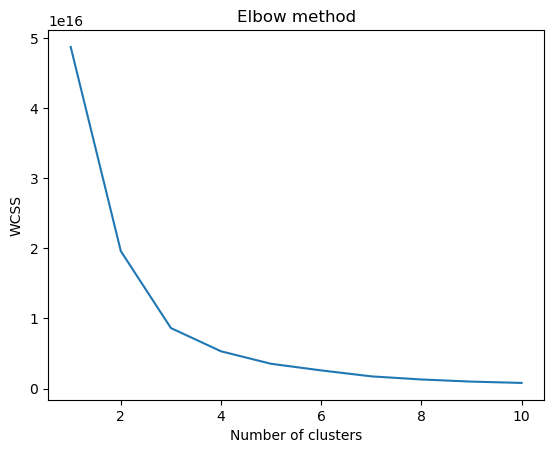

In [36]:
x = CGC_Fianance[['Open', 'Close', 'Volume']].values
wcss = [] 
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

## Silhouette Score:

The Silhouette Score graph shows how clustering quality varies depending on the number of clusters. The x-axis represents the number of clusters (from 2 to 10), and the y-axis shows the Silhouette Score, which measures how well the points within a cluster are clustered. A value close to 1 indicates good clustering, while a value close to -1 suggests poor clustering.

The graph shows that the Silhouette Score is highest when there are two clusters, indicating that two clusters are the optimal number for segmenting the data. Although the Elbow Method suggests three clusters as ideal due to inertia slowing, the Silhouette Score indicates that two clusters provide the best segmentation quality.

In conclusion, the optimal number of clusters for segmenting Canopy Growth Corporation's data, according to the Silhouette Score, is two. Although the Elbow Method suggests three, the Silhouette Score provides a clearer assessment of clustering quality. It is recommended to use the Silhouette Score as the main metric to decide the number of clusters.

Optimal number of clusters according to Silhouette Score: 2


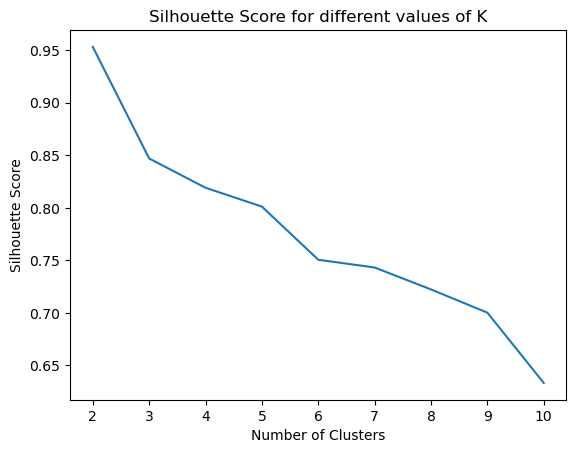

In [40]:
wcss = [] 
silhouette_scores = []  

for i in range(2, 11):  
    kmeans = KMeans(n_clusters=i, max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)  
    wcss.append(kmeans.inertia_)  
    
    score = silhouette_score(x, kmeans.labels_)
    silhouette_scores.append(score)

optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2  
print(f'Optimal number of clusters according to Silhouette Score: {optimal_k}')


plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Score for different values of K')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

#

## Clustering 02 - DBSCAN:

The DBSCAN chart shows how points cluster based on the opening and closing prices of Canopy Growth Corporation stock. Points are colored according to identified clusters, and those that don't fit well into any group are labeled as noise (-1). DBSCAN clusters points based on their density, without requiring a predefined number of clusters. Key parameters are eps (maximum distance between points) and min_samples (minimum number of points to form a cluster). If some points don't cluster well, they can be considered noise, suggesting the presence of outliers. In short, the chart visualizes how DBSCAN segments the data and detects points that don't fit into clusters.

In [43]:
import warnings
warnings.filterwarnings('ignore')

In [44]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

dbscan = DBSCAN()
                                
y_dbscan = dbscan.fit_predict(x_scaled)

In [45]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(CGC_Fianance[['Open', 'Close', 'Volume']])

DBSCAN()

In [46]:
CGC_Fianance['DBSCAN_labels'] = dbscan.labels_

#### Visualisation of clusters:

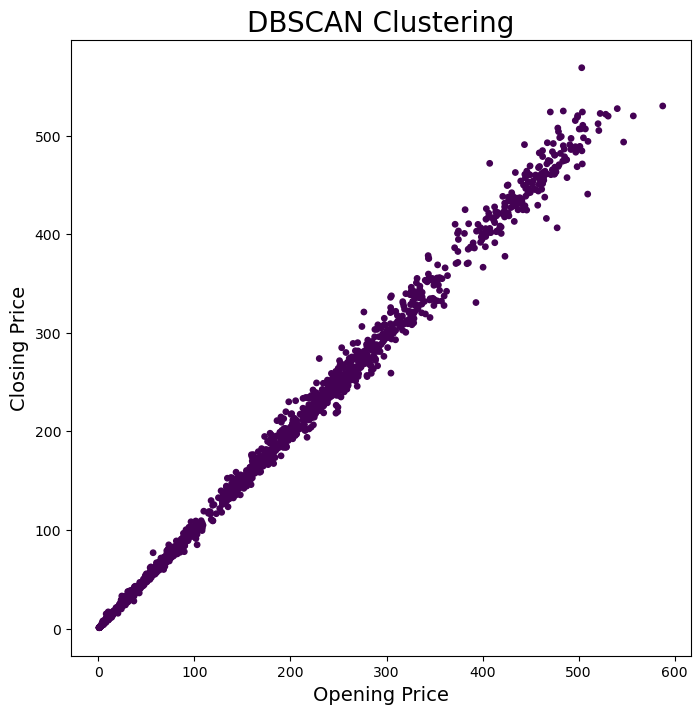

In [53]:
plt.figure(figsize=(8, 8))
plt.scatter(CGC_Fianance['Open'], CGC_Fianance['Close'], c=CGC_Fianance['DBSCAN_labels'], cmap='viridis', s=15)
plt.title('DBSCAN Clustering', fontsize=20)
plt.xlabel('Opening Price', fontsize=14)
plt.ylabel('Closing Price', fontsize=14)
plt.show()

# Davies-Bouldin Index
## Evaluation Metrics: Silhouette Score vs Davies-Bouldin Index:

Davies-Bouldin Index: The optimal number of clusters according to this index is 3 clusters, as this is where the index reaches its lowest value, indicating that the clusters are well-separated and of good quality.

Silhouette Score: According to this metric, the optimal number of clusters is 2 clusters, as this point shows the highest score, suggesting that the quality of the clustering is better with 2 clusters.

Comparison of Results:

The Davies-Bouldin Index focuses on the separation and dispersion of the clusters, while the Silhouette Score evaluates both internal cohesion and separation of the clusters.

Although both methods suggest a different number of clusters, both provide valid options depending on the priority given to separation versus cohesion.

Visualization:

Dendrogram (3 clusters - Davies-Bouldin): Shows that the identified clusters are well-separated.

Davies-Bouldin and Silhouette Score plots: The Davies-Bouldin Index suggests 3 clusters, while the Silhouette Score indicates 2 clusters.

Conclusion:

Davies-Bouldin: Recommendation of 3 clusters (better separation).

Silhouette Score: Recommendation of 2 clusters (better internal quality).

Both methods suggest that 2 or 3 clusters are valid options, depending on whether separation between clusters or internal cohesion is prioritized.

In [56]:
CGC_Fianance_num = CGC_Fianance.select_dtypes(include=['float64', 'int64'])

scaler = StandardScaler()
x_scaled = scaler.fit_transform(CGC_Fianance_num)

In [58]:
def perform_clustering(n_clusters, CGC_Fianance):
    agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
    labels = agg_clustering.fit_predict(CGC_Fianance[['Open', 'Close', 'Volume']])
    
    
    db_index = davies_bouldin_score(CGC_Fianance[['Open', 'Close', 'Volume']], labels)
    silhouette_avg = silhouette_score(CGC_Fianance[['Open', 'Close', 'Volume']], labels)
    
    return db_index, silhouette_avg, labels  

cluster_range = range(2, 11)
db_scores = []
silhouette_scores = []

for n_clusters in cluster_range:
    db_index, silhouette_avg, labels = perform_clustering(n_clusters, CGC_Fianance)
    db_scores.append(db_index)
    silhouette_scores.append(silhouette_avg)


optimal_clusters_silhouette = cluster_range[np.argmax(silhouette_scores)]
optimal_clusters_db = cluster_range[np.argmin(db_scores)]


optimal_agg_clustering = AgglomerativeClustering(n_clusters=optimal_clusters_db)
optimal_labels = optimal_agg_clustering.fit_predict(CGC_Fianance[['Open', 'Close', 'Volume']])


print(f'Optimal Clusters (Davies-Bouldin): {optimal_clusters_db}')
print(f'Optimal Clusters (Silhouette): {optimal_clusters_silhouette}')

Optimal Clusters (Davies-Bouldin): 3
Optimal Clusters (Silhouette): 2


In [59]:
db_index = davies_bouldin_score(x_scaled, optimal_labels)
silhouette_avg = silhouette_score(x_scaled, optimal_labels)

print(f"Davies-Bouldin Index: {db_index}")
print(f"Silhouette Score: {silhouette_avg}")

Davies-Bouldin Index: 0.6013646811853495
Silhouette Score: 0.47649606183546933


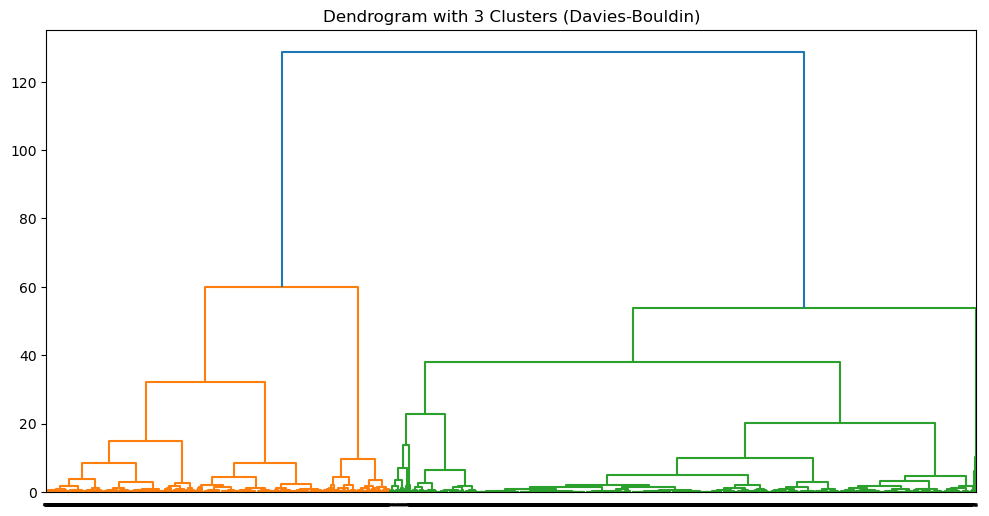

In [60]:
from scipy.cluster.hierarchy import linkage, dendrogram
plt.figure(figsize=(12, 6))
linkage_matrix_optimal = linkage(x_scaled, method='ward')
dendrogram(linkage_matrix_optimal, orientation="top", labels=optimal_labels, distance_sort='descending')
plt.title(f'Dendrogram with {optimal_clusters_db} Clusters (Davies-Bouldin)')
plt.show()

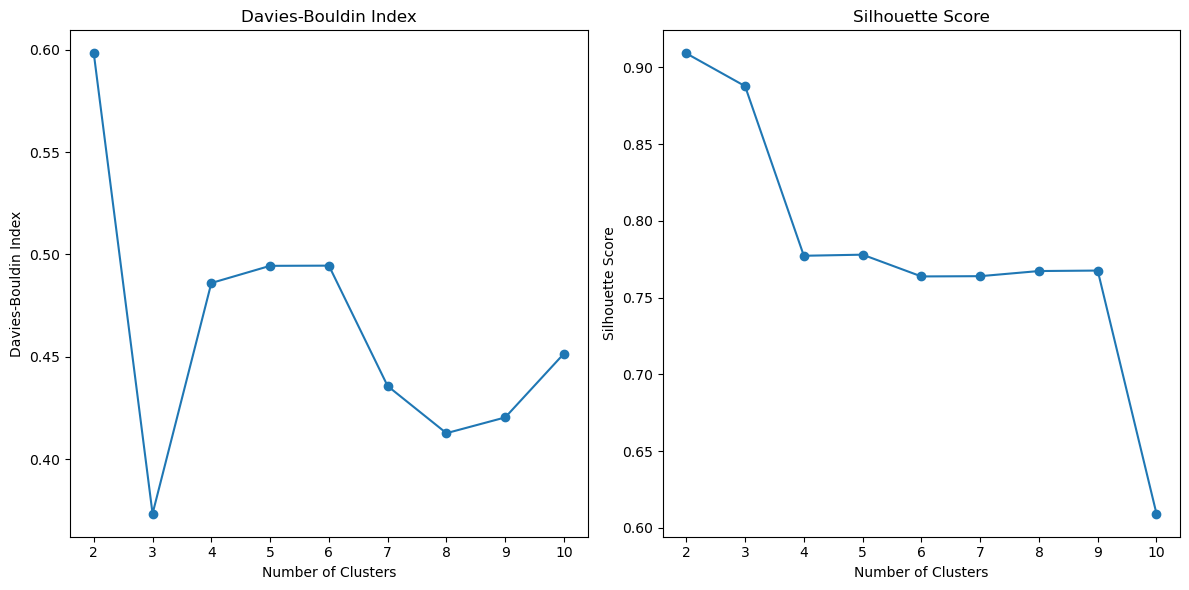

In [61]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(cluster_range, db_scores, marker='o')
plt.title('Davies-Bouldin Index')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Index')

plt.subplot(1, 2, 2)
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

#

# Part III - ARIMA model

A dataset of stock prices was used to analyze trends, seasonality, and anomalies in the data.

Data Analysis:

* Trends**: An increasing trend in stock prices was observed over the last few years, with some periods of high volatility.
* Seasonality**: A slight seasonality in prices was detected, with recurring patterns at certain times.
* Anomalies**: Anomalous price spikes were identified, which could be linked to global economic events.

ARIMA Model:

The ARIMA model was applied to predict future prices. The parameters **p**, **d**, and **q** were determined using autocorrelation analysis and the Akaike Information Criterion (AIC).

Model Evaluation:
The root mean square error (RMSE) was used to evaluate the model's performance. The results showed that the ARIMA model was able to predict prices with reasonable accuracy, although it could not precisely capture the volatility spikes.


In [64]:
def plotds(xt, nlag = 30, fig_size = (12, 10)):
    if not isinstance(xt, pd.Series):
         xt = pd.Series(xt)
    plt.figure(figsize=fig_size)
    layout = (2, 2)
    ax_xt = plt.subplot2grid(layout, (0, 0), colspan = 2)
    ax_acf= plt.subplot2grid(layout, (1, 0))
    ax_pacf = plt.subplot2grid(layout, (1, 1))

    xt.plot(ax = ax_xt)
    ax_xt.set_title('Time Series')
    plot_acf(xt, lags = 50, ax = ax_acf)
    plot_pacf(xt, lags = 50, ax = ax_pacf)
    plt.tight_layout()
    return None

In [65]:
CGC_Fianance = pd.read_csv('CGC_Fianance.csv')
CGC_Fianance['Date'] = pd.to_datetime(CGC_Fianance['Date'], format='%d/%m/%Y')
CGC_Fianance.set_index('Date', inplace=True)  
CGC_Fianance = df.dropna() 

#### Closing price time series:

The chart illustrates the fluctuations in the closing price of Canopy Growth Corporation's stock over time. Significant spikes and drops are observed, suggesting that these changes may be linked to key events in the market or within the company. The overall trend is volatile, with increases followed by decreases, which is typical for emerging companies or markets with high uncertainty.

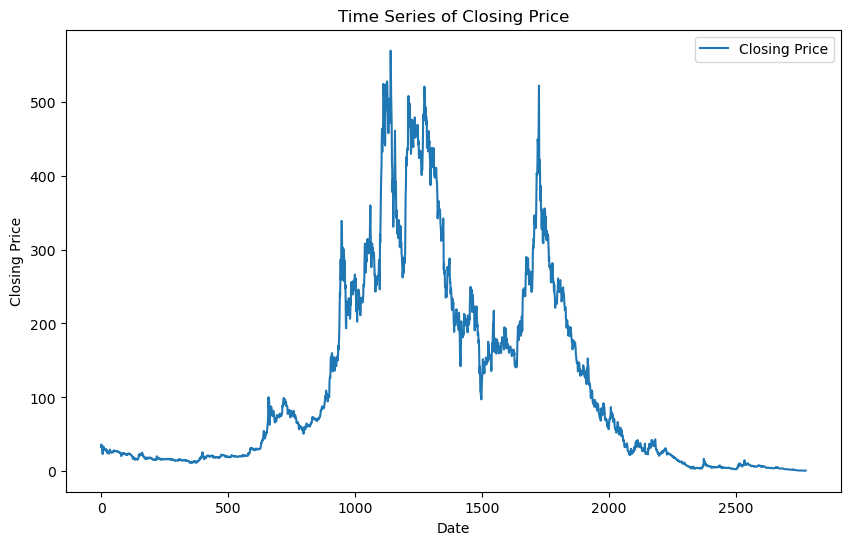

In [67]:
plt.figure(figsize=(10, 6))
plt.plot(CGC_Fianance['Close'], label='Closing Price')
plt.title('Time Series of Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

#### Plotting the Autocorrelation and Partial Autocorrelation functions:

The autocorrelation chart shows how the closing prices are correlated with their past values. There's a strong correlation in the early lags, indicating that previous prices have a significant influence on current prices.

On the other hand, the partial autocorrelation chart shows the direct correlations between closing prices and their lags, removing any indirect correlations. In this chart, the partial autocorrelation decreases after a certain number of lags, which helps in determining the appropriate order for an ARIMA model.

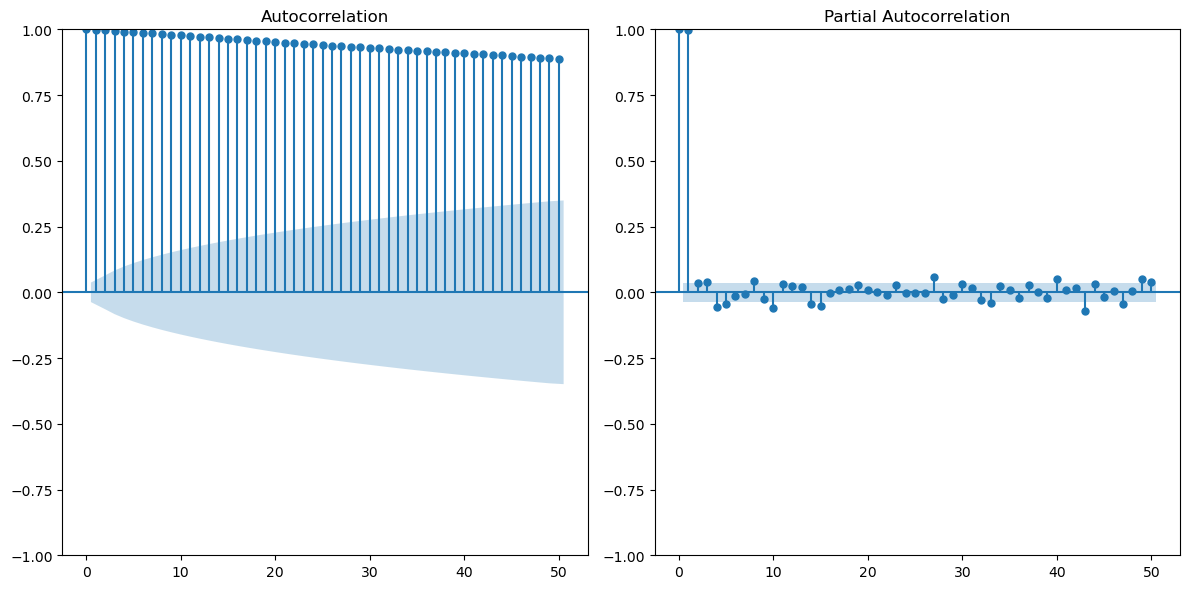

In [69]:
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(CGC_Fianance['Close'], lags=50, ax=plt.gca())
plt.subplot(122)
plot_pacf(CGC_Fianance['Close'], lags=50, ax=plt.gca())
plt.tight_layout()
plt.show()


#### Differencing to make the time series stationary:

Differencing is applied to make the time series stationary by removing the trend, making the series more suitable for ARIMA modeling. The chart compares the original series (in blue) with the differenced series (in red).

The goal of this transformation is to ensure the series has a constant mean and variance, which is a key requirement for using the ARIMA model.

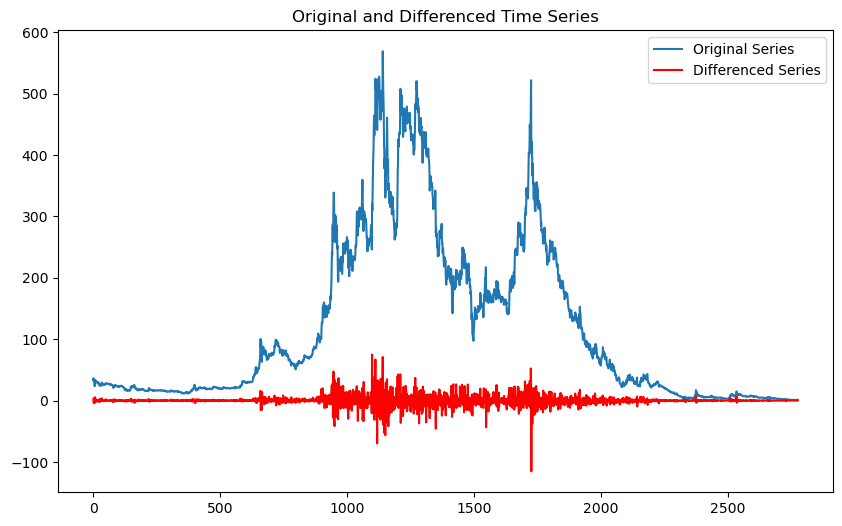

In [73]:
CGC_Fianance['Close_diff'] = CGC_Fianance['Close'].diff(1).dropna()

plt.figure(figsize=(10, 6))
plt.plot(CGC_Fianance['Close'], label='Original Series')
plt.plot(CGC_Fianance['Close_diff'], label='Differenced Series', color='red')
plt.title('Original and Differenced Time Series')
plt.legend()
plt.show()


#### The ARIMA model: 
The ARIMA(1, 1, 1) model displays the following fitted parameters:

AR(1): The autoregressive coefficient is 0.18, meaning the closing price at time t is correlated with the price at time t-1.

MA(1): The moving average coefficient is -0.23, suggesting that the differences between the closing prices at t and t-1 influence the prediction.

sigma²: The error variance is 73.06, indicating the magnitude of the errors in the predictions.

AIC and BIC: These values help assess the model's quality, with lower AIC and BIC values indicating a better fit.

In [75]:
model = ARIMA(CGC_Fianance['Close'], order=(1, 1, 1))  
model_fit = model.fit()  
print(model_fit.summary()) 

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2775
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -9888.222
Date:                Sun, 20 Apr 2025   AIC                          19782.443
Time:                        14:31:28   BIC                          19800.227
Sample:                             0   HQIC                         19788.865
                               - 2775                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1804      0.190      0.951      0.342      -0.191       0.552
ma.L1         -0.2250      0.186     -1.212      0.226      -0.589       0.139
sigma2        73.0637      0.591    123.538      0.0

## Predictions for the next 90 days:

The chart shows the predicted closing prices for the next 90 days, based on the fitted ARIMA model. The predictions are represented in red, while the actual data is shown in blue.

The prediction follows the downward trend of the prices observed in the historical data, which is consistent with the trend of the time series. However, the accuracy of the prediction decreases as we move further into the future, which is common in time series models.

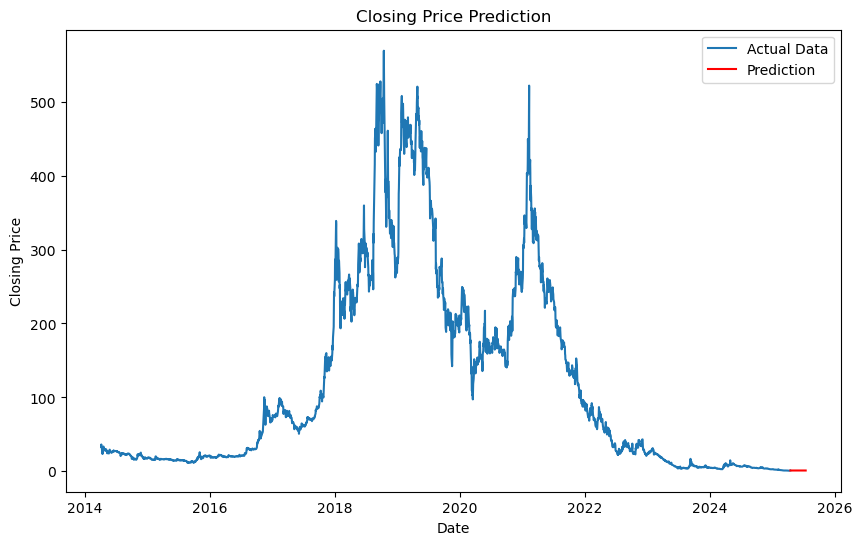

In [77]:
last_date = CGC_Fianance['Date'].iloc[-1]

forecast = model_fit.forecast(steps=90)  
forecast_dates = pd.date_range(last_date, periods=91, freq='D')[1:]

plt.figure(figsize=(10, 6))
plt.plot(CGC_Fianance['Date'],CGC_Fianance['Close'], label='Actual Data') 
plt.plot(forecast_dates, forecast, label='Prediction', color='red') 
plt.title('Closing Price Prediction')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

#

# References

* Tutorial 1 - kMeans Clustering File
* Elbow_Point_Plot
* Tutorial_3 DBSCAN (Solution) File
* Tutorial 6 (a) (ARIMA Model)
* Yahoo Finance Datasets
* yahooFinance.ipynb
